<a href="https://colab.research.google.com/github/Nandhini-93/Singapore-Resale-Flat-Prices-Predicting/blob/main/Singapore_Flat_Resale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import json

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import datetime as dt

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio


import warnings
warnings.filterwarnings('ignore')

import requests
import glob
import os

In [ ]:
df1=pd.read_csv("/content/drive/MyDrive/Datasets/ResaleFlatPricesBasedonApprovalDate19901999.csv")
df2=pd.read_csv("/content/drive/MyDrive/Datasets/ResaleFlatPricesBasedonApprovalDate2000Feb2012.csv")
df3=pd.read_csv("/content/drive/MyDrive/Datasets/ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014.csv")
df4=pd.read_csv("/content/drive/MyDrive/Datasets/ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016.csv")
df5=pd.read_csv("/content/drive/MyDrive/Datasets/ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv")



In [ ]:
# merging all the datasets

df=pd.concat([df1,df2,df3,df4,df5], ignore_index=True)
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
927275,2024-04,YISHUN,EXECUTIVE,836,YISHUN ST 81,04 TO 06,142.0,Apartment,1988,805000.0,62 years 10 months
927276,2024-05,YISHUN,EXECUTIVE,834,YISHUN ST 81,04 TO 06,154.0,Maisonette,1988,948000.0,62 years 09 months
927277,2024-06,YISHUN,EXECUTIVE,826,YISHUN ST 81,10 TO 12,146.0,Maisonette,1988,1000000.0,62 years 08 months
927278,2024-02,YISHUN,MULTI-GENERATION,666,YISHUN AVE 4,04 TO 06,164.0,Multi Generation,1987,998000.0,62 years 11 months


In [ ]:
df.shape


(927280, 11)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 927280 entries, 0 to 927279
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                927280 non-null  object 
 1   town                 927280 non-null  object 
 2   flat_type            927280 non-null  object 
 3   block                927280 non-null  object 
 4   street_name          927280 non-null  object 
 5   storey_range         927280 non-null  object 
 6   floor_area_sqm       927280 non-null  float64
 7   flat_model           927280 non-null  object 
 8   lease_commence_date  927280 non-null  int64  
 9   resale_price         927280 non-null  float64
 10  remaining_lease      218230 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 77.8+ MB


In [ ]:
df.columns


Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price',
       'remaining_lease'],
      dtype='object')

In [ ]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
floor_area_sqm,927280.0,95.690987,25.825050,28.0,73.0,93.0,113.0,307.0
lease_commence_date,927280.0,1988.276343,10.663145,1966.0,1981.0,1986.0,1996.0,2022.0
resale_price,927280.0,320783.208689,170450.043194,5000.0,193000.0,297000.0,418000.0,1568888.0


In [ ]:
df['resale_price'].value_counts()


resale_price
300000.0    6922
350000.0    6847
280000.0    6549
320000.0    6528
400000.0    6286
            ... 
141488.0       1
286750.0       1
161380.0       1
262350.0       1
670002.0       1
Name: count, Length: 9520, dtype: int64

In [ ]:
# Data Cleaning

df.nunique()


month                   414
town                     27
flat_type                 8
block                  2712
street_name             584
storey_range             25
floor_area_sqm          212
flat_model               34
lease_commence_date      56
resale_price           9520
remaining_lease         726
dtype: int64

In [ ]:
df.isna().sum()


month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        709050
dtype: int64

In [ ]:
# REMAINING_LEASE

def convert_to_years(row):
    if pd.notna(row) and isinstance(row, str):
        if 'years' in row:
            parts = row.split()
            years = float(parts[0])
            months = float(parts[2]) if len(parts) > 2 else 0
            return years + months / 12
    return row

In [ ]:
df['remaining_lease'] =df['remaining_lease'].apply(convert_to_years)


In [ ]:
# fill null values in remaining_lease with mode beacuse null value more than 25% it will remove affected in accuracy
df['remaining_lease']=df['remaining_lease'].fillna(df['remaining_lease'].mode()[0])
df.tail()


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
927275,2024-04,YISHUN,EXECUTIVE,836,YISHUN ST 81,04 TO 06,142.0,Apartment,1988,805000.0,62.833333
927276,2024-05,YISHUN,EXECUTIVE,834,YISHUN ST 81,04 TO 06,154.0,Maisonette,1988,948000.0,62.750000
927277,2024-06,YISHUN,EXECUTIVE,826,YISHUN ST 81,10 TO 12,146.0,Maisonette,1988,1000000.0,62.666667
927278,2024-02,YISHUN,MULTI-GENERATION,666,YISHUN AVE 4,04 TO 06,164.0,Multi Generation,1987,998000.0,62.916667
927279,2024-03,YISHUN,MULTI-GENERATION,666,YISHUN AVE 4,10 TO 12,164.0,Multi Generation,1987,1200000.0,62.750000


In [ ]:
df['remaining_lease'].value_counts()


remaining_lease
68.000000    711642
95.000000      2372
67.000000      2212
69.000000      1914
71.000000      1763
              ...  
97.750000         1
96.833333         1
97.250000         1
97.583333         1
41.500000         1
Name: count, Length: 673, dtype: int64

In [ ]:
df.isnull().sum()


month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
remaining_lease        0
dtype: int64

In [ ]:
df.dtypes


month                   object
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
remaining_lease        float64
dtype: object

In [ ]:
#Month column

# Separate the year and month of resale beacuse this is time series Data
df[['resale_year', 'resale_month']] =df['month'].str.split('-', expand=True)

# drop the resale month column
df.drop('month', axis = 1, inplace= True)

df.head(2)

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month
0,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,68.0,1990,01
1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,68.0,1990,01


In [ ]:
# Split the 'Range' column into lower and upper bounds
df[['storey_lower_bound', 'storey_upper_bound']] = df['storey_range'].str.split(' TO ', expand=True)

# Convert the lower and upper bounds to numeric values
df['storey_lower_bound'] = pd.to_numeric(df['storey_lower_bound'])
df['storey_upper_bound'] = pd.to_numeric(df['storey_upper_bound'])

df.tail(2)

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
927278,YISHUN,MULTI-GENERATION,666,YISHUN AVE 4,04 TO 06,164.0,Multi Generation,1987,998000.0,62.916667,2024,02,4,6
927279,YISHUN,MULTI-GENERATION,666,YISHUN AVE 4,10 TO 12,164.0,Multi Generation,1987,1200000.0,62.750000,2024,03,10,12


In [ ]:
df.drop('storey_range', axis = 1, inplace= True)


In [ ]:
# CONVERTING

df['block'] = pd.to_numeric(df['block'], errors='coerce')
df['resale_year'] = pd.to_numeric(df['resale_year'], errors='coerce')
df['resale_month'] = pd.to_numeric(df['resale_month'], errors='coerce')
df['block'] = df['block'].fillna(df['block'].mode()[0])

In [ ]:
df.head()


,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
0,ANG MO KIO,1 ROOM,309.0,ANG MO KIO AVE 1,31.0,IMPROVED,1977,9000.0,68.0,1990,1,10,12
1,ANG MO KIO,1 ROOM,309.0,ANG MO KIO AVE 1,31.0,IMPROVED,1977,6000.0,68.0,1990,1,4,6
2,ANG MO KIO,1 ROOM,309.0,ANG MO KIO AVE 1,31.0,IMPROVED,1977,8000.0,68.0,1990,1,10,12
3,ANG MO KIO,1 ROOM,309.0,ANG MO KIO AVE 1,31.0,IMPROVED,1977,6000.0,68.0,1990,1,7,9
4,ANG MO KIO,3 ROOM,216.0,ANG MO KIO AVE 1,73.0,NEW GENERATION,1976,47200.0,68.0,1990,1,4,6


In [ ]:
df.dtypes


town                    object
flat_type               object
block                  float64
street_name             object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
remaining_lease        float64
resale_year              int64
resale_month             int64
storey_lower_bound       int64
storey_upper_bound       int64
dtype: object

In [ ]:
#TEXT ERRORS

object_data_cols = [var for var in df.columns if df[var].dtype == 'object']
object_data_cols

['town', 'flat_type', 'street_name', 'flat_model']

In [ ]:
df['town'].value_counts()


town
TAMPINES           79988
YISHUN             70085
JURONG WEST        66704
BEDOK              66670
WOODLANDS          65553
ANG MO KIO         52082
HOUGANG            50762
BUKIT BATOK        44421
CHOA CHU KANG      38340
BUKIT MERAH        34372
PASIR RIS          33233
SENGKANG           32478
TOA PAYOH          31533
QUEENSTOWN         28783
GEYLANG            28170
CLEMENTI           28037
BUKIT PANJANG      27702
KALLANG/WHAMPOA    27188
JURONG EAST        24794
SERANGOON          22829
BISHAN             21266
PUNGGOL            20653
SEMBAWANG          13865
MARINE PARADE       8041
CENTRAL AREA        7150
BUKIT TIMAH         2517
LIM CHU KANG          64
Name: count, dtype: int64

In [ ]:
df['flat_type'].value_counts()


flat_type
4 ROOM              352414
3 ROOM              296021
5 ROOM              195475
EXECUTIVE            69688
2 ROOM               11835
1 ROOM                1304
MULTI GENERATION       279
MULTI-GENERATION       264
Name: count, dtype: int64

In [ ]:
# Replace 'MULTI-GENERATION' with 'MULTI GENERATION' in the specified column to avoid duplicate
df['flat_type'] = df['flat_type'].str.replace('MULTI-GENERATION', 'MULTI GENERATION')

In [ ]:
df['flat_type'].value_counts()


flat_type
4 ROOM              352414
3 ROOM              296021
5 ROOM              195475
EXECUTIVE            69688
2 ROOM               11835
1 ROOM                1304
MULTI GENERATION       543
Name: count, dtype: int64

In [ ]:
df['street_name'].value_counts()


street_name
YISHUN RING RD        17605
BEDOK RESERVOIR RD    14725
ANG MO KIO AVE 10     13809
ANG MO KIO AVE 3      12154
HOUGANG AVE 8          9366
                      ...  
GEYLANG EAST AVE 2       15
SEMBAWANG WAY            14
OUTRAM HILL               9
MARINE PARADE CTRL        3
ALJUNIED AVE 2            1
Name: count, Length: 584, dtype: int64

In [ ]:
df['flat_model'].value_counts()


flat_model
Model A                   194818
Improved                  168272
New Generation            110102
NEW GENERATION             78898
IMPROVED                   73589
MODEL A                    70381
Premium Apartment          46789
Simplified                 34296
Apartment                  25596
Standard                   25175
SIMPLIFIED                 23258
Maisonette                 17457
STANDARD                   17375
MAISONETTE                 12215
Model A2                   10140
APARTMENT                   9901
DBSS                        3306
Adjoined flat               1250
Model A-Maisonette          1095
MODEL A-MAISONETTE           982
Terrace                      447
Type S1                      437
MULTI GENERATION             279
Multi Generation             264
TERRACE                      247
Type S2                      217
2-room                       115
Premium Apartment Loft       108
Premium Maisonette            86
Improved-Maisonette           82

In [ ]:
df['flat_model'] = df['flat_model'].replace({'MODEL A':'Model A','NEW GENERATION':'New Generation',
                                             'IMPROVED':'Improved','PREMIUM APARTMENT':'Premium Apartment',
                                             'MULTI GENERATION':'Multi Generation ','2-ROOM':'2-room',
                                            'SIMPLIFIED':'Simplified','STANDARD':'Standard',
                                             'MAISONETTE':'Maisonette','MULTI GENERATION':'Multi Generation',
                                             'APARTMENT':'Apartment','MODEL A-MAISONETTE':'Model A-Maisonette',
                                             'TERRACE':'Terrace','IMPROVED-MAISONETTE':'Improved-Maisonette'})

In [121]:
df['flat_model'].value_counts()


flat_model
Model A                   264535
Improved                  241148
New Generation            188545
Simplified                 57444
Premium Apartment          46580
Standard                   42456
Apartment                  35466
Maisonette                 29644
Model A2                   10118
DBSS                        3296
Model A-Maisonette          2076
Adjoined flat               1249
Terrace                      694
Multi Generation             543
Type S1                      435
Type S2                      217
2-room                       136
Improved-Maisonette          126
Premium Apartment Loft       108
Premium Maisonette            85
3Gen                          32
Name: count, dtype: int64

In [ ]:
# Duplicates

df.duplicated().sum()


2347

In [ ]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [ ]:
# Outliers

float_data_cols = [var for var in df.columns if df[var].dtype == 'float64']
float_data_cols

['block', 'floor_area_sqm', 'resale_price', 'remaining_lease']

In [ ]:
integer_data_cols = [var for var in df.columns if df[var].dtype == 'int64']
integer_data_cols

['lease_commence_date',
 'resale_year',
 'resale_month',
 'storey_lower_bound',
 'storey_upper_bound']

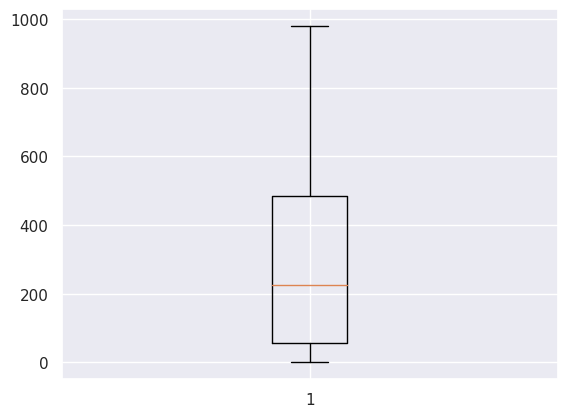

In [ ]:
# Using Boxplot

# Creating plot
plt.boxplot(df['block'] )

# show plot
plt.show()


In [ ]:
# IQR

Q1 = df['block'].quantile(0.25)
Q3 = df['block'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound , upper_bound

(-586.0, 1126.0)

In [ ]:
df.block = df.block.clip(lower_bound , upper_bound)


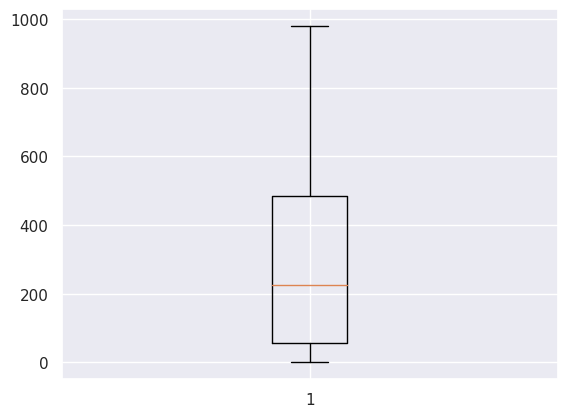

In [ ]:
# Creating plot
plt.boxplot(df['block'] )

# show plot
plt.show()


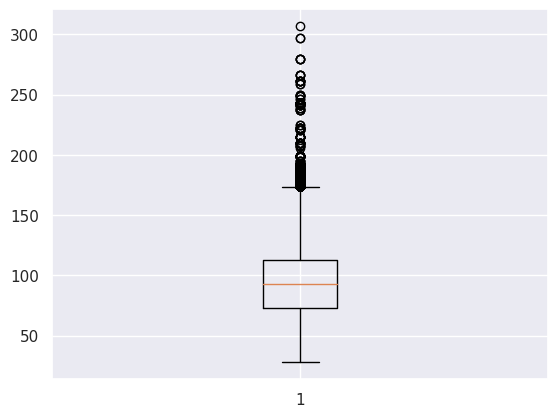

In [ ]:
# Creating plot
plt.boxplot(df['floor_area_sqm'] )

# show plot
plt.show()


In [ ]:
Q1 = df['floor_area_sqm'].quantile(0.25)
Q3 = df['floor_area_sqm'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound , upper_bound

(13.0, 173.0)

In [ ]:
df.floor_area_sqm = df.floor_area_sqm.clip(lower_bound , upper_bound)


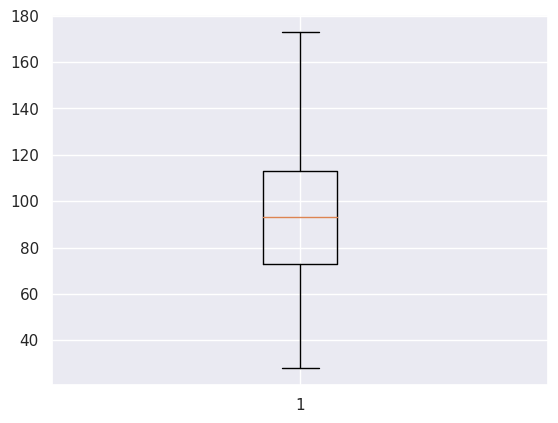

In [ ]:
# Creating plot
plt.boxplot(df['floor_area_sqm'] )

# show plot
plt.show()


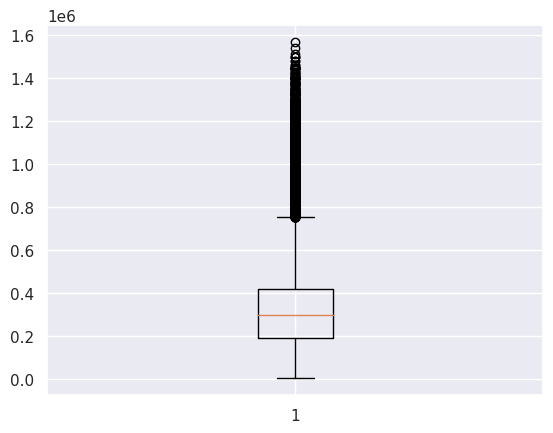

In [ ]:
# Creating plot
plt.boxplot(df['resale_price'] )

# show plot
plt.show()

In [ ]:
Q1 = df['resale_price'].quantile(0.25)
Q3 = df['resale_price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound , upper_bound

(-144500.0, 755500.0)

In [ ]:
df.resale_price = df.resale_price.clip(lower_bound , upper_bound)


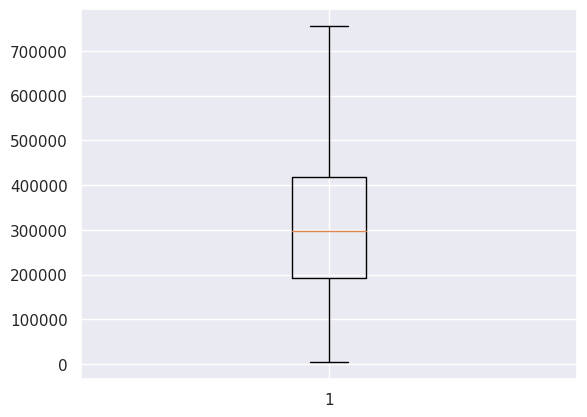

In [ ]:
# Creating plot
plt.boxplot(df['resale_price'] )

# show plot
plt.show()


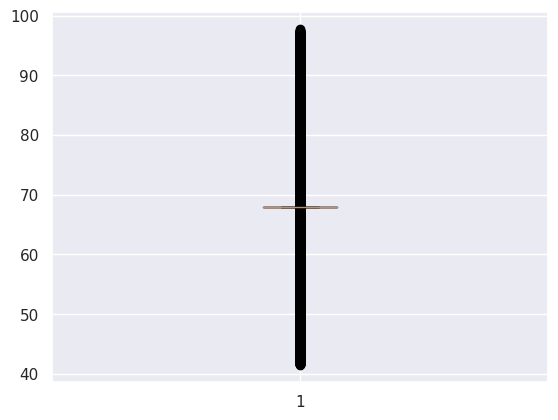

In [ ]:
# Creating plot
plt.boxplot(df['remaining_lease'] )

# show plot
plt.show()

In [ ]:
Q1 = df['remaining_lease'].quantile(0.25)
Q3 = df['remaining_lease'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound , upper_bound

(68.0, 68.0)

In [ ]:
df.remaining_lease = df.remaining_lease.clip(lower_bound , upper_bound)


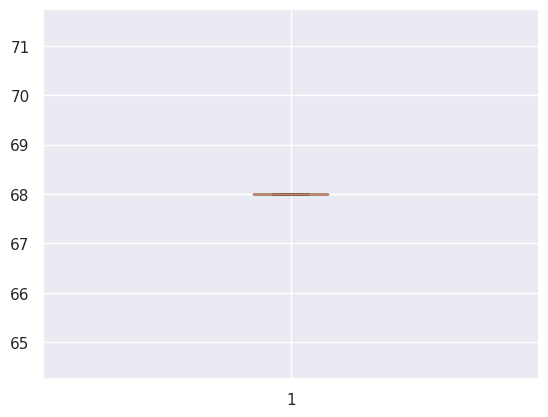

In [ ]:
# Creating plot
plt.boxplot(df['remaining_lease'] )

# show plot
plt.show()

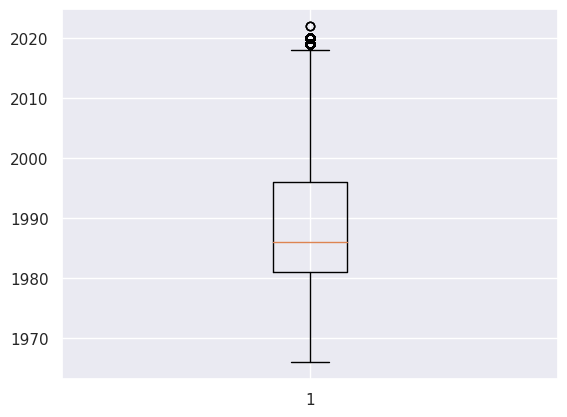

In [ ]:
# Creating plot
plt.boxplot(df['lease_commence_date'] )

# show plot
plt.show()


In [ ]:
Q1 = df['lease_commence_date'].quantile(0.25)
Q3 = df['lease_commence_date'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound , upper_bound

(1958.5, 2018.5)

In [ ]:
df.lease_commence_date = df.lease_commence_date.clip(lower_bound , upper_bound)


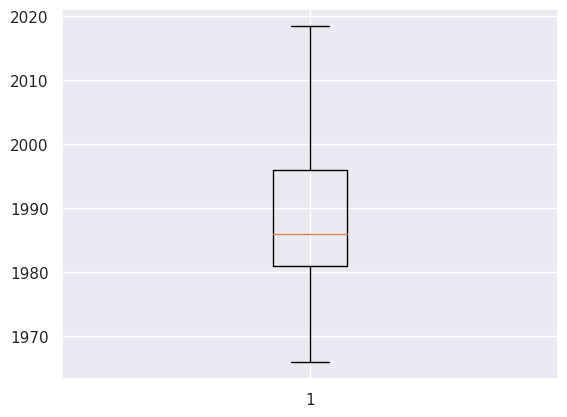

In [ ]:
# Creating plot
plt.boxplot(df['lease_commence_date'] )

# show plot
plt.show()

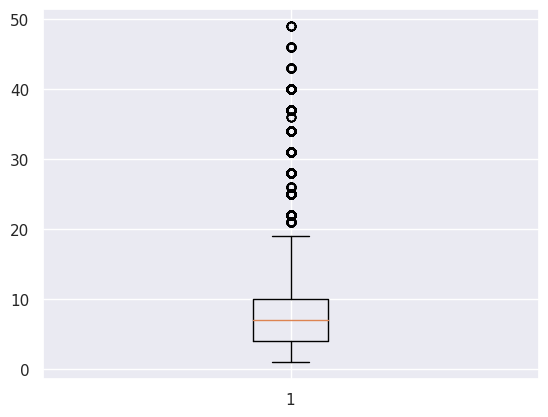

In [ ]:
# Creating plot
plt.boxplot(df['storey_lower_bound'] )

# show plot
plt.show()

In [ ]:
Q1 = df['storey_lower_bound'].quantile(0.25)
Q3 = df['storey_lower_bound'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound , upper_bound

(-5.0, 19.0)

In [ ]:
df.storey_lower_bound = df.storey_lower_bound.clip(lower_bound , upper_bound)


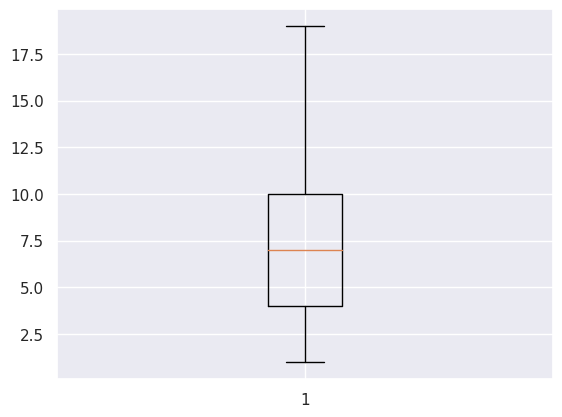

In [ ]:
# Creating plot
plt.boxplot(df['storey_lower_bound'] )

# show plot
plt.show()


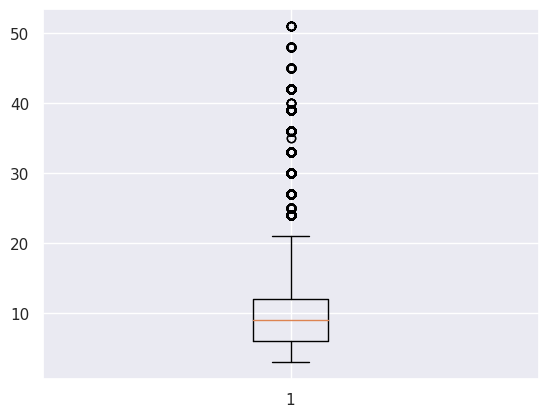

In [ ]:
# Creating plot
plt.boxplot(df['storey_upper_bound'] )

# show plot
plt.show()

In [ ]:
Q1 = df['storey_upper_bound'].quantile(0.25)
Q3 = df['storey_upper_bound'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound , upper_bound

(-3.0, 21.0)

In [ ]:
df.storey_upper_bound = df.storey_upper_bound.clip(lower_bound , upper_bound)


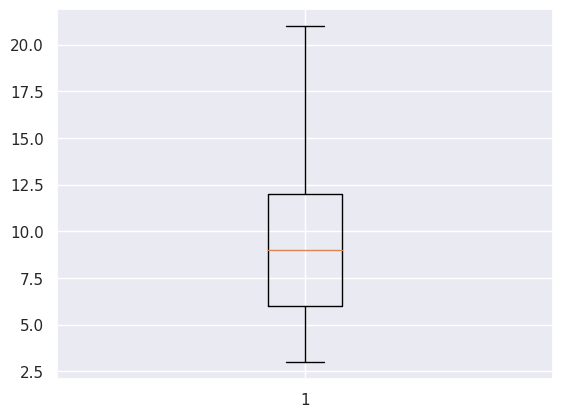

In [ ]:
# Creating plot
plt.boxplot(df['storey_upper_bound'] )

# show plot
plt.show()

EDA - EXPLORATARY DATA ANALYSIS


In [ ]:
# Categorical Vs Frequency using BarPlot


In [ ]:
object_data_cols = [var for var in df.columns if df[var].dtype == 'object']
object_data_cols

['town', 'flat_type', 'street_name', 'flat_model']

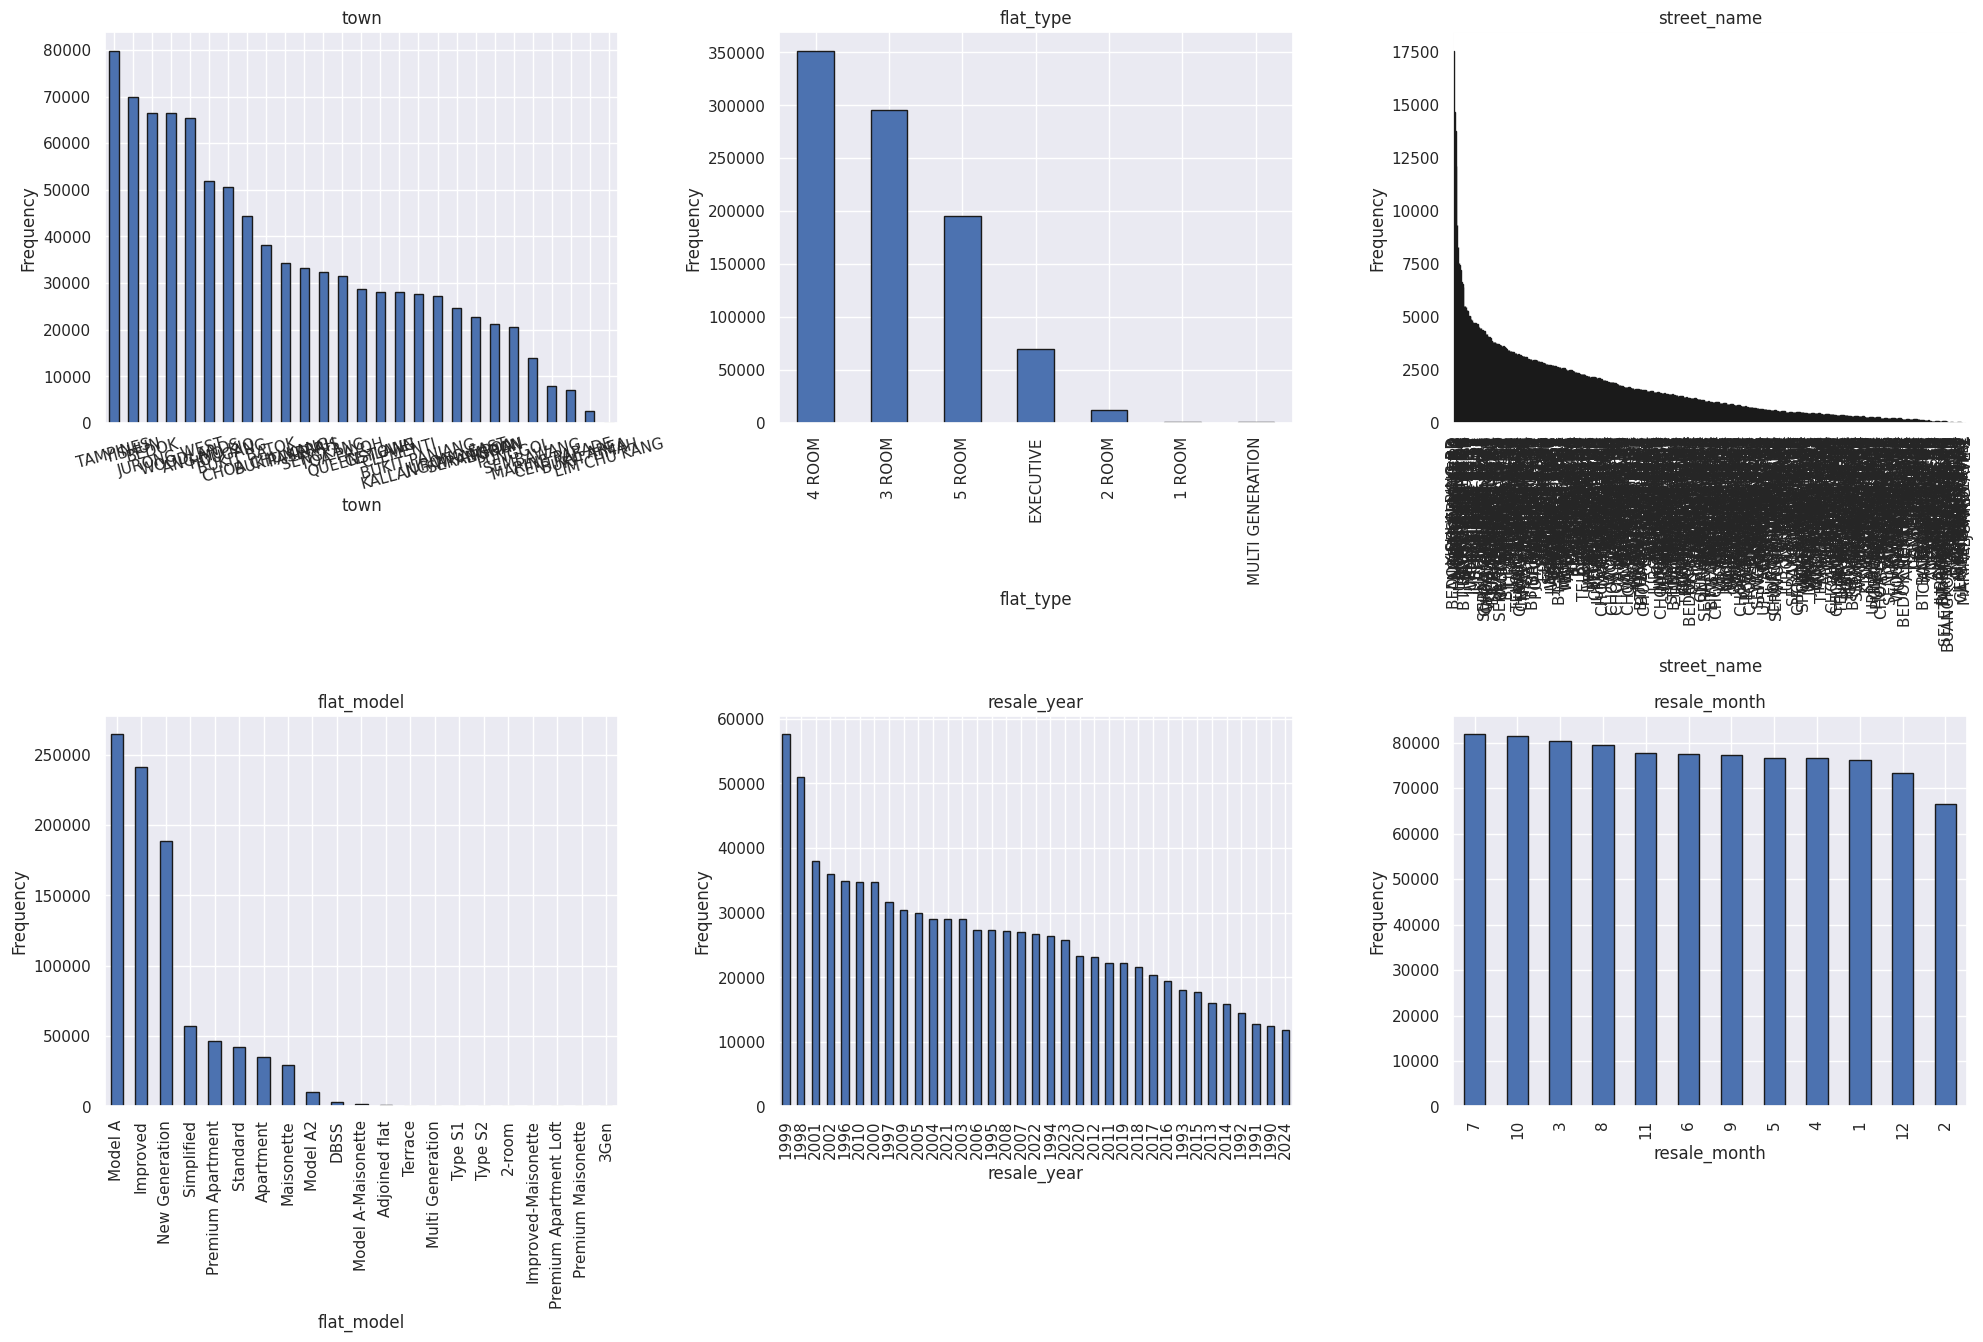

In [ ]:
plt.figure(figsize=(20, 25))



plt.subplot(431)
df['town'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('town')
plt.xlabel('town')
plt.ylabel('Frequency')
plt.xticks(rotation=15)

plt.subplot(432)
df['flat_type'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('flat_type')
plt.xlabel('flat_type')
plt.ylabel('Frequency')

plt.subplot(433)
df['street_name'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('street_name')
plt.xlabel('street_name')
plt.ylabel('Frequency')

plt.subplot(434)
df['flat_model'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('flat_model')
plt.xlabel('flat_model')
plt.ylabel('Frequency')

plt.subplot(435)
df['resale_year'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('resale_year')
plt.xlabel('resale_year')
plt.ylabel('Frequency')

plt.subplot(436)
df['resale_month'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('resale_month')
plt.xlabel('resale_month')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

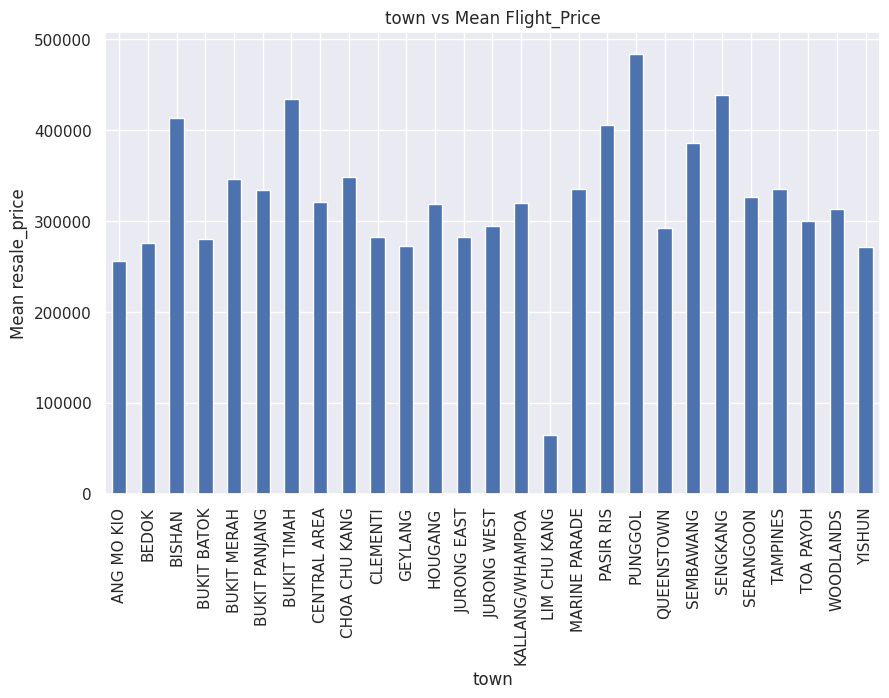

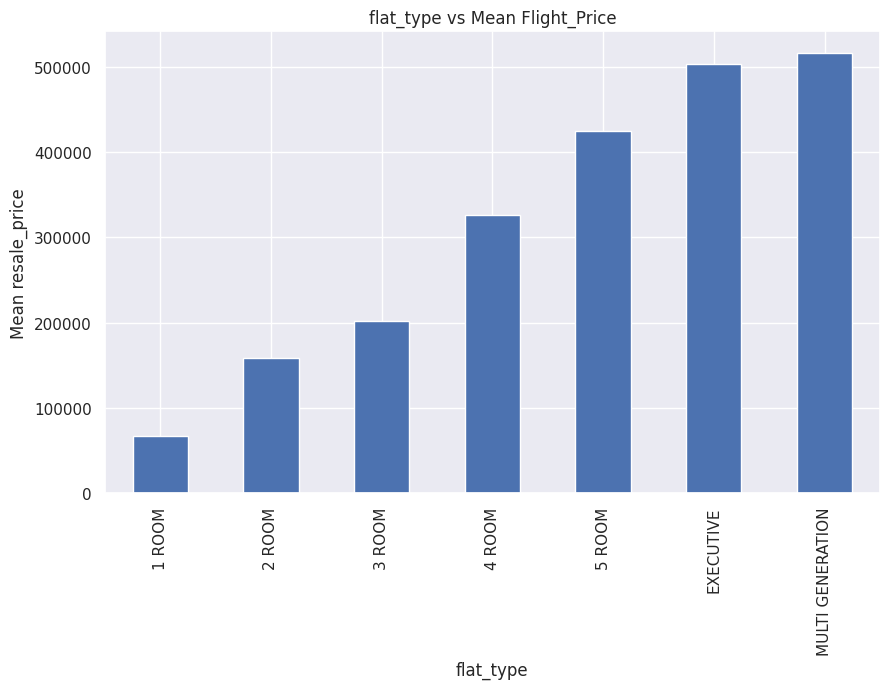

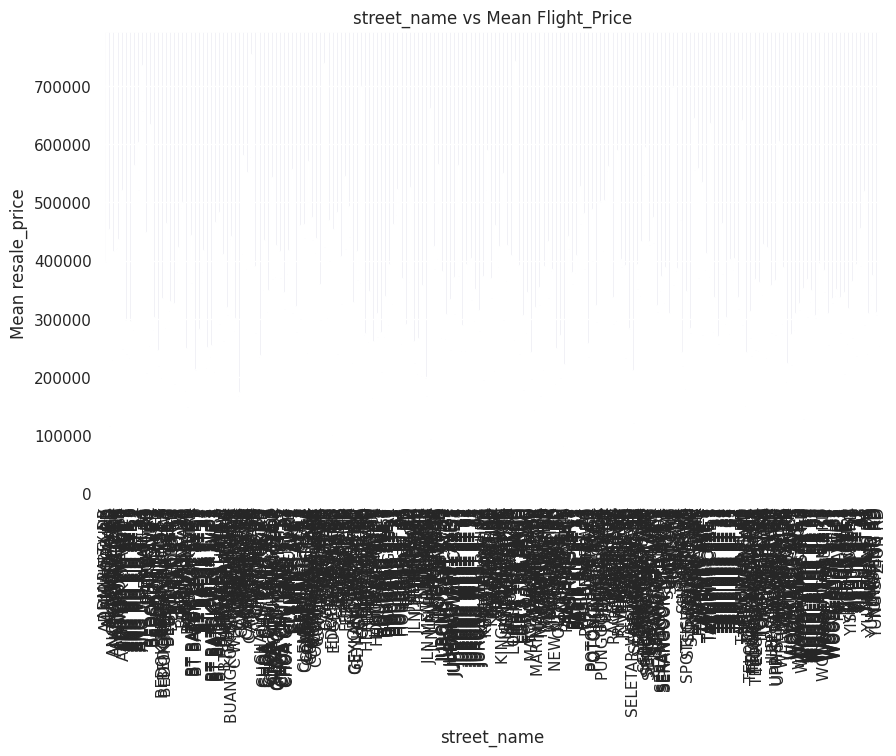

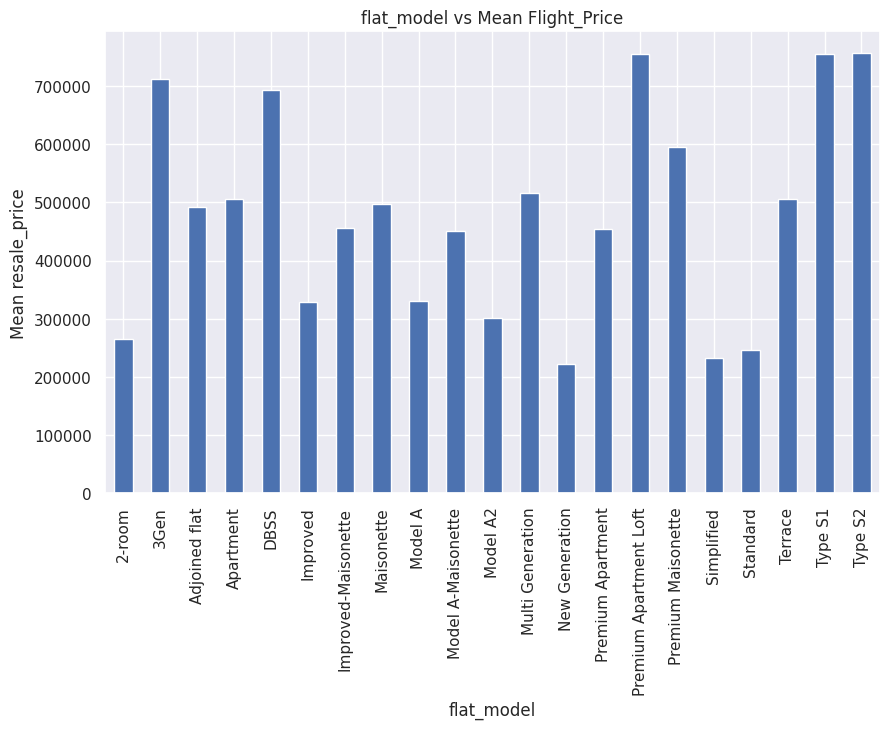

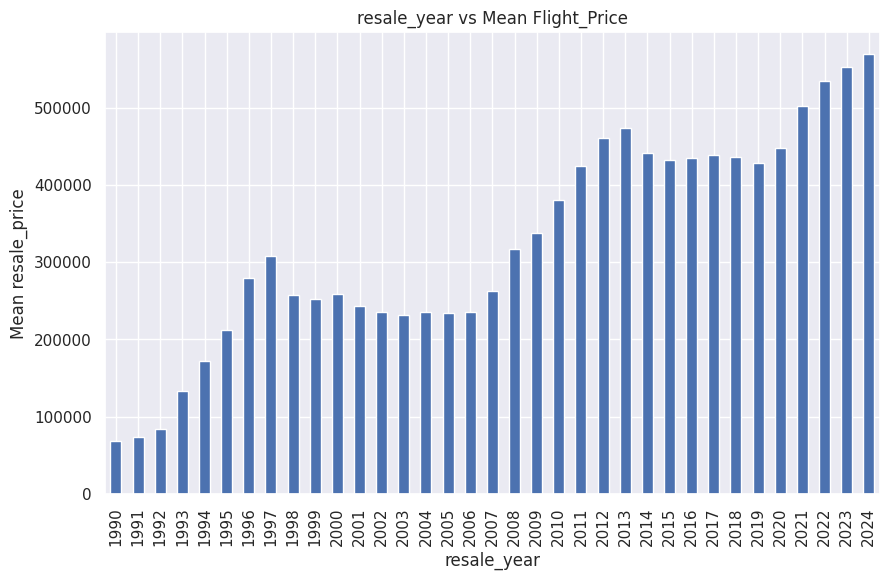

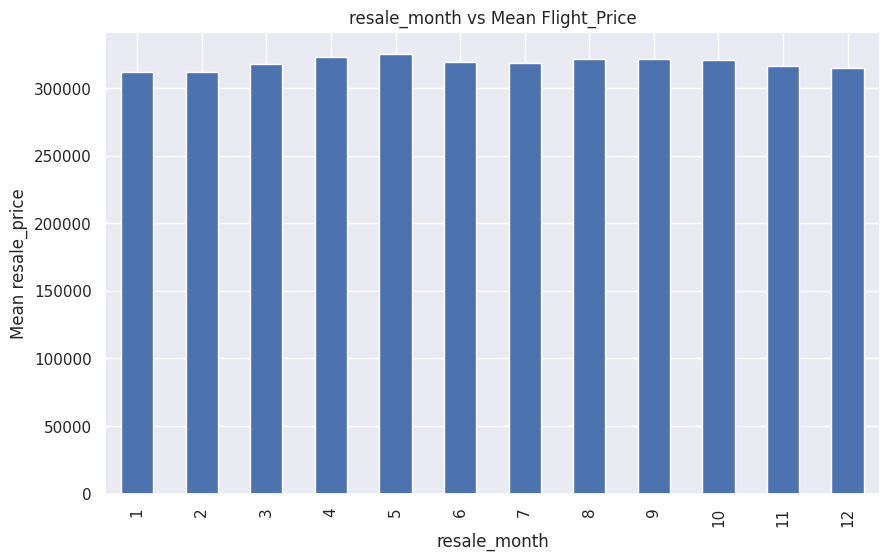

In [ ]:
#Feature Vs Target (Categorical Data )

# List of features to plot
features = [
    'town',
 'flat_type',
 'street_name',
 'flat_model',
 'resale_year',
 'resale_month'
]
for feature in features:
    plt.figure(figsize=(10, 6))
    df.groupby(feature)['resale_price'].mean().plot(kind='bar')
    plt.xlabel(feature)
    plt.ylabel('Mean resale_price')
    plt.title(f'{feature} vs Mean Flight_Price')
    plt.show()


In [ ]:
# Feature Vs Target (Condinues Data )

float_data_cols = [var for var in df.columns if df[var].dtype == 'float64']
float_data_cols


['block',
 'floor_area_sqm',
 'lease_commence_date',
 'resale_price',
 'remaining_lease']

In [ ]:
integer_data_cols = [var for var in df.columns if df[var].dtype == 'int64']
integer_data_cols

['resale_year', 'resale_month', 'storey_lower_bound', 'storey_upper_bound']

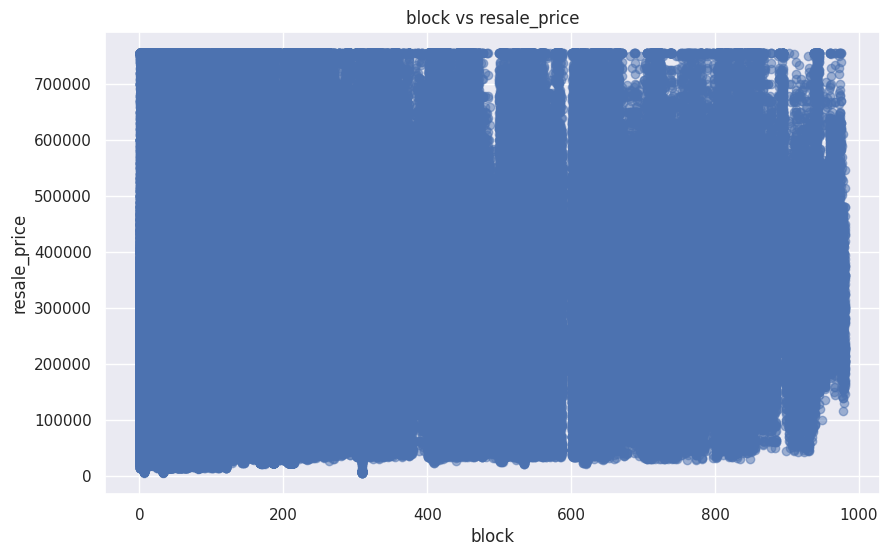

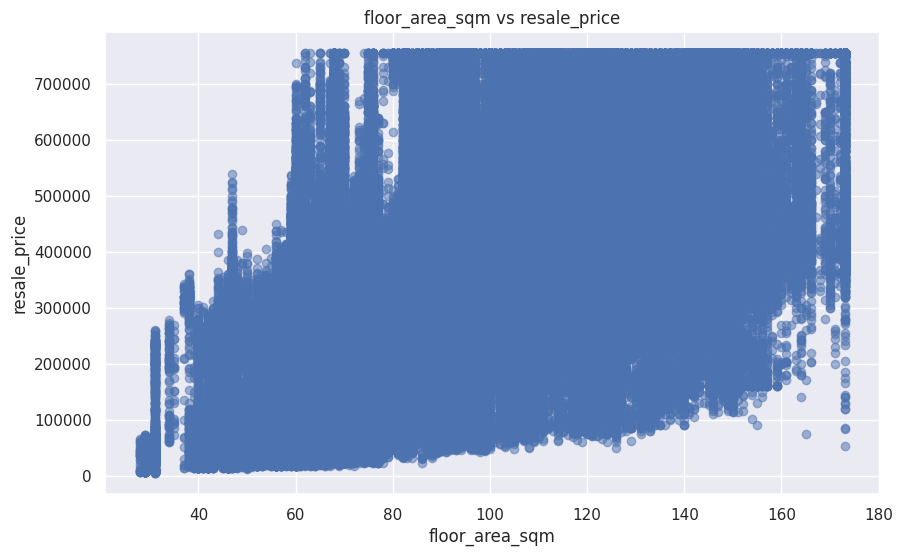

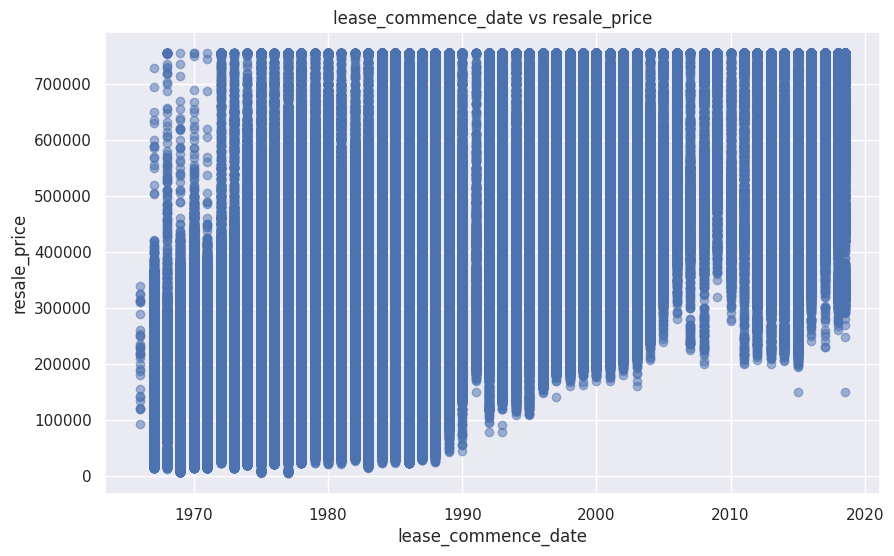

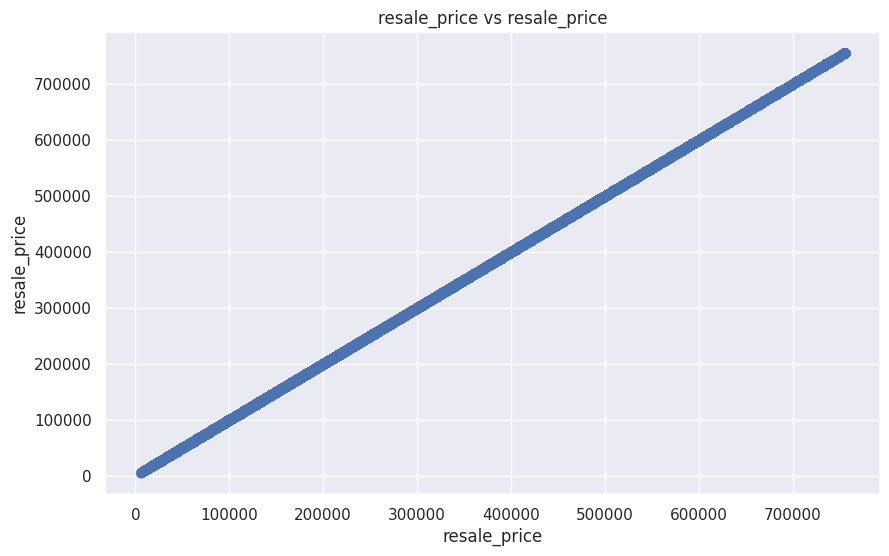

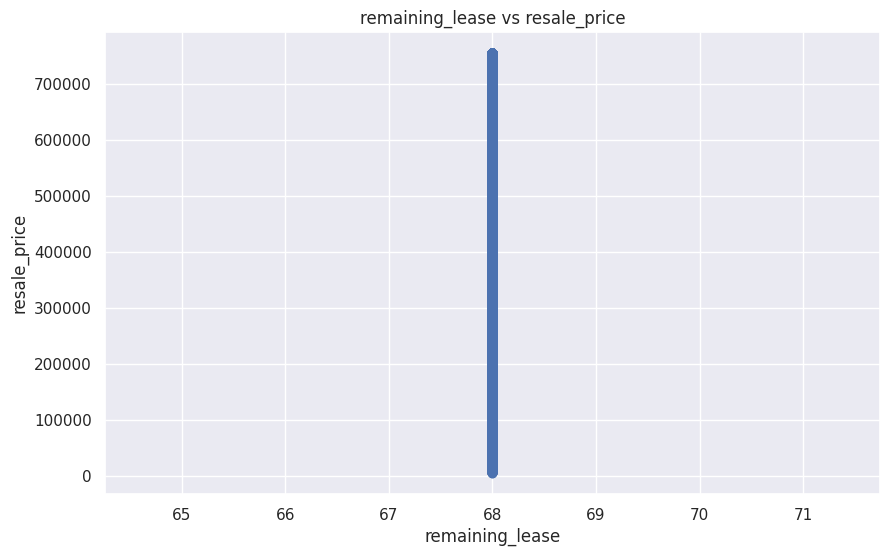

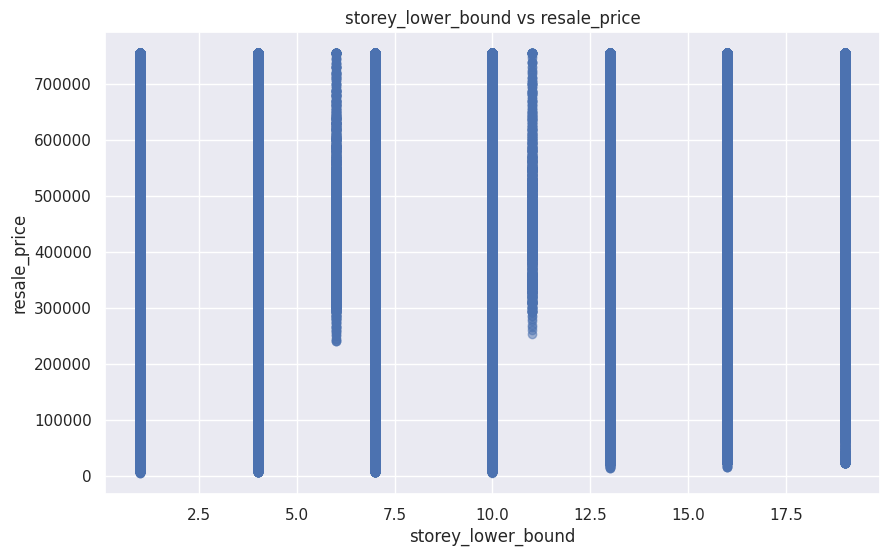

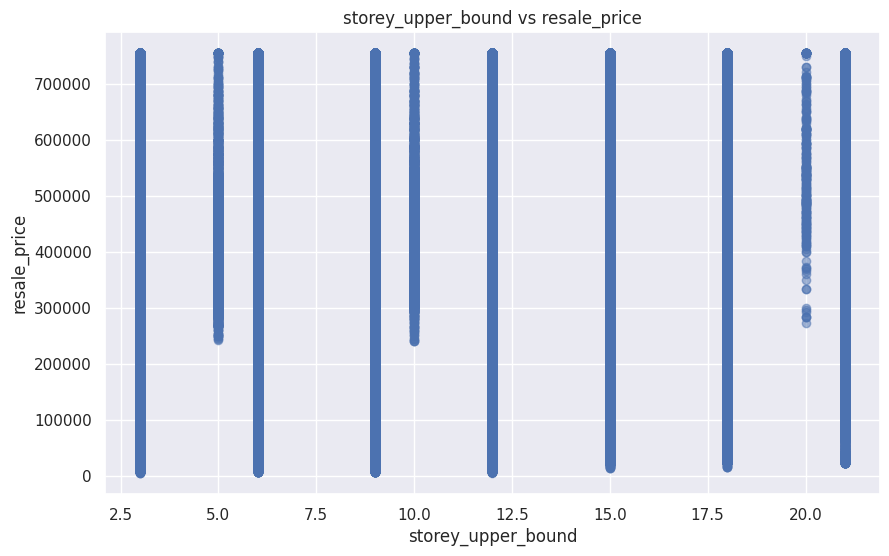

In [ ]:
features = [ 'block',
 'floor_area_sqm',
 'lease_commence_date',
 'resale_price',
 'remaining_lease',
'storey_lower_bound',
'storey_upper_bound']
target = 'resale_price'
for feature in features:
    plt.figure(figsize=(10, 6))
    plt.scatter(df[feature], df[target], alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.title(f'{feature} vs {target}')
    plt.show()


Encoding Categorical Variables


In [ ]:
#using encoding make a copy
df1=df.copy()

object_data_cols = [var for var in df.columns if df[var].dtype == 'object']
object_data_cols

['town', 'flat_type', 'street_name', 'flat_model']

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Initialize the Encoder
le= LabelEncoder()

In [ ]:
# list unique street names
streets = df1['street_name'].unique()
# map the streets to povide input to ML model
streets_mapping = {street: idx + 1 for idx, street in enumerate(streets)}
streets_mapping

{'ANG MO KIO AVE 1': 1,
 'ANG MO KIO AVE 3': 2,
 'ANG MO KIO AVE 4': 3,
 'ANG MO KIO AVE 10': 4,
 'ANG MO KIO AVE 5': 5,
 'ANG MO KIO AVE 8': 6,
 'ANG MO KIO AVE 6': 7,
 'ANG MO KIO AVE 9': 8,
 'ANG MO KIO AVE 2': 9,
 'BEDOK RESERVOIR RD': 10,
 'BEDOK NTH ST 3': 11,
 'BEDOK STH RD': 12,
 'NEW UPP CHANGI RD': 13,
 'BEDOK NTH RD': 14,
 'BEDOK STH AVE 1': 15,
 'CHAI CHEE RD': 16,
 'CHAI CHEE DR': 17,
 'BEDOK NTH AVE 4': 18,
 'BEDOK STH AVE 3': 19,
 'BEDOK STH AVE 2': 20,
 'BEDOK NTH ST 2': 21,
 'BEDOK NTH ST 4': 22,
 'BEDOK NTH AVE 2': 23,
 'BEDOK NTH AVE 3': 24,
 'BEDOK NTH AVE 1': 25,
 'BEDOK NTH ST 1': 26,
 'CHAI CHEE ST': 27,
 'SIN MING RD': 28,
 'SHUNFU RD': 29,
 'BT BATOK ST 11': 30,
 'BT BATOK WEST AVE 8': 31,
 'BT BATOK WEST AVE 6': 32,
 'BT BATOK ST 21': 33,
 'BT BATOK EAST AVE 5': 34,
 'BT BATOK EAST AVE 4': 35,
 'HILLVIEW AVE': 36,
 'BT BATOK CTRL': 37,
 'BT BATOK ST 31': 38,
 'BT BATOK EAST AVE 3': 39,
 'TAMAN HO SWEE': 40,
 'TELOK BLANGAH CRES': 41,
 'BEO CRES': 42,
 'TELOK B

In [ ]:
# alter the column with the mapped numbers
df1['street_name'] = df1['street_name'].map(streets_mapping)

# Display the DataFrame
df1.head(2)

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
0,ANG MO KIO,1 ROOM,309.0,1,31.0,Improved,1977.0,9000.0,68.0,1990,1,10,12
1,ANG MO KIO,1 ROOM,309.0,1,31.0,Improved,1977.0,6000.0,68.0,1990,1,4,6


In [ ]:
df1['flat_type'].unique()


array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION'], dtype=object)

In [ ]:
category_mapping = {
    '1 ROOM': 1,
    '2 ROOM': 2,
    '3 ROOM': 3,
    '4 ROOM': 4,
    '5 ROOM': 5,
    'EXECUTIVE': 6,
    'MULTI GENERATION': 7
}

# alter the column with the mapped numbers
df1['flat_type'] =df1['flat_type'].map(category_mapping)

# Display the DataFrame
df1.head(2)

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
0,ANG MO KIO,1,309.0,1,31.0,Improved,1977.0,9000.0,68.0,1990,1,10,12
1,ANG MO KIO,1,309.0,1,31.0,Improved,1977.0,6000.0,68.0,1990,1,4,6


In [ ]:
# Create a mapping of 'flat_model' values to numbers
flat_model_mapping = {
    'IMPROVED': 1,
    'NEW GENERATION': 2,
    'MODEL A': 3,
    'STANDARD': 4,
    'SIMPLIFIED': 5,
    'MODEL A-MAISONETTE': 6,
    'APARTMENT': 7,
    'MAISONETTE': 8,
    'TERRACE': 9,
    '2-ROOM': 10,
    'IMPROVED-MAISONETTE': 11,
    'MULTI GENERATION': 12,
    'PREMIUM APARTMENT': 13,
    'Improved': 14,
    'New Generation': 15,
    'Model A': 16,
    'Standard': 17,
    'Apartment': 18,
    'Simplified': 19,
    'Model A-Maisonette': 20,
    'Maisonette': 21,
    'Multi Generation': 22,
    'Adjoined flat': 23,
    'Premium Apartment': 24,
    'Terrace': 25,
    'Improved-Maisonette': 26,
    'Premium Maisonette': 27,
    '2-room': 28,
    'Model A2': 29,
    'DBSS': 30,
    'Type S1': 31,
    'Type S2': 32,
    'Premium Apartment Loft': 33,
    '3Gen': 34
}

# Map 'flat_model' values to numbers
df1['flat_model'] =df1['flat_model'].map(flat_model_mapping)

# Display the DataFrame
df1.head(3)

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
0,ANG MO KIO,1,309.0,1,31.0,14,1977.0,9000.0,68.0,1990,1,10,12
1,ANG MO KIO,1,309.0,1,31.0,14,1977.0,6000.0,68.0,1990,1,4,6
2,ANG MO KIO,1,309.0,1,31.0,14,1977.0,8000.0,68.0,1990,1,10,12


In [ ]:
# Create a mapping of 'town' values to numbers
town_mapping = {
    'ANG MO KIO': 1,
    'BEDOK': 2,
    'BISHAN': 3,
    'BUKIT BATOK': 4,
    'BUKIT MERAH': 5,
    'BUKIT TIMAH': 6,
    'CENTRAL AREA': 7,
    'CHOA CHU KANG': 8,
    'CLEMENTI': 9,
    'GEYLANG': 10,
    'HOUGANG': 11,
    'JURONG EAST': 12,
    'JURONG WEST': 13,
    'KALLANG/WHAMPOA': 14,
    'MARINE PARADE': 15,
    'QUEENSTOWN': 16,
    'SENGKANG': 17,
    'SERANGOON': 18,
    'TAMPINES': 19,
    'TOA PAYOH': 20,
    'WOODLANDS': 21,
    'YISHUN': 22,
    'LIM CHU KANG': 23,
    'SEMBAWANG': 24,
    'BUKIT PANJANG': 25,
    'PASIR RIS': 26,
    'PUNGGOL': 27
}

# Map 'town' values to numbers
df1['town'] = df1['town'].map(town_mapping)

# Display the DataFrame
df1.head(4)

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
0,1,1,309.0,1,31.0,14,1977.0,9000.0,68.0,1990,1,10,12
1,1,1,309.0,1,31.0,14,1977.0,6000.0,68.0,1990,1,4,6
2,1,1,309.0,1,31.0,14,1977.0,8000.0,68.0,1990,1,10,12
3,1,1,309.0,1,31.0,14,1977.0,6000.0,68.0,1990,1,7,9


In [124]:
# save the preprocessed data for the deployment
df1.to_csv('finaldata.csv',index= False)

In [123]:
# To read the file

df1=pd.read_csv('finaldata.csv')



In [ ]:
# Correlation

# correlation matrix (ranges from 1 to -1)
corrm=df1.corr()
#corrm.to_csv('corrm.csv')
corrm

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
town,1.000000,0.208414,0.050520,0.587257,0.201220,0.163725,0.333515,0.123384,NaN,0.124179,0.003914,-0.019097,-0.018834
flat_type,0.208414,1.000000,0.127916,0.387028,0.954847,0.242556,0.409045,0.600480,NaN,0.101065,0.003402,0.077544,0.077876
block,0.050520,0.127916,1.000000,0.047096,0.187830,-0.002815,0.004709,-0.082434,NaN,-0.116045,0.002254,-0.124562,-0.124600
street_name,0.587257,0.387028,0.047096,1.000000,0.355963,0.354151,0.738011,0.379052,NaN,0.317446,0.006180,0.081510,0.082150
floor_area_sqm,0.201220,0.954847,0.187830,0.355963,1.000000,0.200457,0.387184,0.575042,NaN,0.062833,0.002851,0.043803,0.043992
flat_model,0.163725,0.242556,-0.002815,0.354151,0.200457,1.000000,0.355881,0.245974,NaN,0.162460,0.001548,0.019830,0.020189
lease_commence_date,0.333515,0.409045,0.004709,0.738011,0.387184,0.355881,1.000000,0.543322,NaN,0.430653,0.003420,0.153379,0.153784
resale_price,0.123384,0.600480,-0.082434,0.379052,0.575042,0.245974,0.543322,1.000000,NaN,0.682856,0.005145,0.209703,0.212370
remaining_lease,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
resale_year,0.124179,0.101065,-0.116045,0.317446,0.062833,0.162460,0.430653,0.682856,NaN,1.000000,-0.025942,0.096240,0.098293


Heatmap


<Axes: >

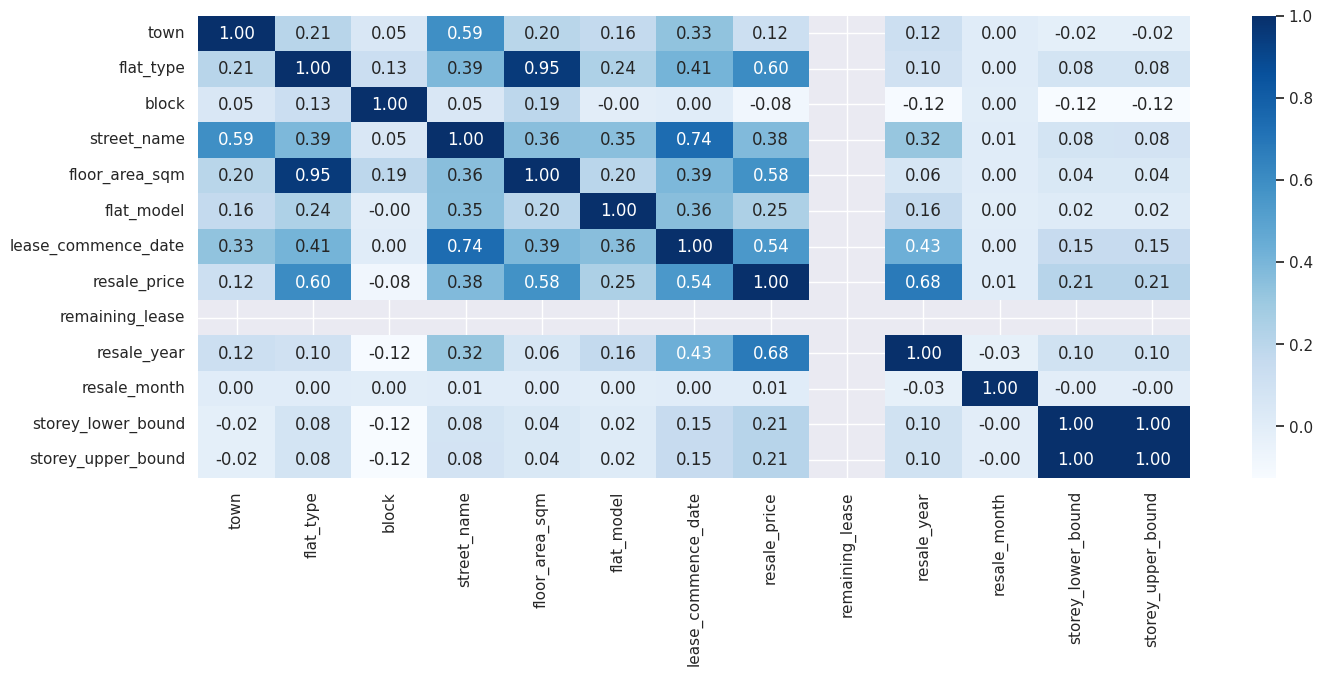

In [ ]:
# visualize correlation matrix in Seaborn using a heatmap
plt.figure(figsize=(16,6))
sns.heatmap(corrm,annot=True,cmap="Blues",fmt=".2f")

TO MEACHIN LEARNING

Split



In [ ]:
# assign feature and target variable
x = df1.drop('resale_price', axis= 1)
y = df1['resale_price']
#splitting the data into training and testing sets with the ratio of 8:2
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=72)

print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)


(739946, 12) (184987, 12) (739946,) (184987,)


Scalling


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)
x_train_scaled ,x_test_scaled

(array([[ 1.58188682,  2.09383312, -0.31954483, ..., -0.45417045,
         -1.2542474 , -1.2577678 ],
        [-1.11038915, -1.06997126, -0.70796897, ..., -0.74700269,
          0.76771646,  0.76462311],
        [-0.08476021, -1.06997126, -0.40713067, ...,  1.30282302,
          0.76771646,  0.76462311],
        ...,
        [ 1.4536832 ,  1.03923166, -0.19007012, ..., -0.1613382 ,
          1.44170441,  1.43875341],
        [ 0.29985064, -0.0153698 , -0.76128208, ...,  0.42432629,
          1.44170441,  1.43875341],
        [-1.23859277, -0.0153698 ,  0.4458792 , ...,  0.71715853,
         -0.58025944, -0.58363749]]),
 array([[ 1.4536832 , -0.0153698 , -1.10781734, ...,  1.00999078,
          0.76771646,  0.76462311],
        [ 1.06907235, -0.0153698 ,  1.65684857, ...,  1.30282302,
         -1.2542474 , -1.2577678 ],
        [ 1.71009043, -0.0153698 , -1.10781734, ..., -0.45417045,
          1.44170441,  1.43875341],
        ...,
        [ 0.94086873, -1.06997126, -0.72700937, ...,  

Model Fit


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

import xgboost as xgb
from xgboost import XGBRegressor  # Use XGBRegressor for regression

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Linear Regression


In [ ]:
linear_model = LinearRegression(fit_intercept=True) #initialise
linear_model.fit(x_train,y_train)
print(linear_model.predict(x_test))  #prediction
print(y_test)

[521542.78412401 222000.15610405 479961.38501379 ... 250612.46119944
 352551.64961775 293838.41614645]
827015    465000.0
451729    170000.0
753337    435000.0
687700    491000.0
245255    216500.0
            ...   
575928    398000.0
763237    275000.0
626737    259000.0
765335    258000.0
325696    225000.0
Name: resale_price, Length: 184987, dtype: float64


In [ ]:
linear_model.score(x_test, y_test)


0.7920277414546185

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_linear_model=cross_val_score(linear_model,x_train,y_train,cv=10).mean()
cross_val_linear_model


0.7914867279618741

KNN-K Nearest Neighbor Regression


In [ ]:
# Create and train the K Nearest Neighbor Regression model
knn_regressor = KNeighborsRegressor(n_neighbors=5)  # You may need to adjust the number of neighbors
knn_regressor.fit(x_train_scaled, y_train)

# Make predictions on the test set using KNN model
y_pred_knn = knn_regressor.predict(x_test_scaled)

# Calculate Mean Absolute Error (MAE)
mae_knn = mean_absolute_error(y_test, y_pred_knn)

# Calculate Mean Squared Error (MSE)
mse_knn = mean_squared_error(y_test, y_pred_knn)

# Calculate Root Mean Squared Error (RMSE)
rmse_knn = np.sqrt(mse_knn)

# Calculate R-squared (R2) Score
r2_knn = r2_score(y_test, y_pred_knn)

print("Mean Absolute Error (MAE)    :", mae_knn)
print("Mean Squared Error (MSE)     :", mse_knn)
print("Root Mean Square Error (RMSE):", rmse_knn)
print("R-squared (R2) Score         :", r2_knn)

Mean Absolute Error (MAE)    : 28861.994291263705
Mean Squared Error (MSE)     : 1773649210.723344
Root Mean Square Error (RMSE): 42114.71489542989
R-squared (R2) Score         : 0.933235030923786


Decision Tree Regression


In [ ]:
# Create and train the Decision Tree Regressor model
dt_regressor = DecisionTreeRegressor(max_depth=20, random_state=11)
dt_regressor.fit(x_train, y_train)

# Make predictions on the test set using Decision Tree model
y_pred_dt = dt_regressor.predict(x_test)

# Calculate Mean Absolute Error (MAE)
mae_dt = mean_absolute_error(y_test, y_pred_dt)

# Calculate Mean Squared Error (MSE)
mse_dt = mean_squared_error(y_test, y_pred_dt)

# Calculate Root Mean Squared Error (RMSE)
rmse_dt = np.sqrt(mse_dt)

# Calculate R-squared (R2) Score
r2_dt = r2_score(y_test, y_pred_dt)

print("Mean Absolute Error (MAE)    :", mae_dt)
print("Mean Squared Error (MSE)     :", mse_dt)
print("Root Mean Square Error (RMSE):", rmse_dt)
print("R-squared (R2) Score         :", r2_dt)

Mean Absolute Error (MAE)    : 17461.225474869174
Mean Squared Error (MSE)     : 672596783.1107093
Root Mean Square Error (RMSE): 25934.470943335422
R-squared (R2) Score         : 0.9746816319970996


Random Forest Regression


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Create and train the Random Forest Regressor model
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(x_train, y_train)

# Make predictions on the test set
y_pred = rf_regressor.predict(x_test)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate R-squared (R2) Score
rf_r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE)    :", mae)
print("Mean Squared Error (MSE)     :", mse)
print("Root Mean Square Error (RMSE):", rmse)
print("R-squared (R2) Score         :", rf_r2)

Mean Absolute Error (MAE)    : 13874.709206063799
Mean Squared Error (MSE)     : 402827131.70467335
Root Mean Square Error (RMSE): 20070.553846485487
R-squared (R2) Score         : 0.9848364936940637


Xg Boost Regression


In [ ]:
# Create and train an XGBoost regressor
xgregressor = XGBRegressor()
xgregressor.fit(x_train, y_train)

# Make predictions
y_pred = xgregressor.predict(x_test)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate R-squared (R2) Score
xgb_r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE)    :", mae)
print("Mean Squared Error (MSE)     :", mse)
print("Root Mean Square Error (RMSE):", rmse)
print("R-squared (R2) Score         :", xgb_r2)

Mean Absolute Error (MAE)    : 16966.996465529937
Mean Squared Error (MSE)     : 561467758.9366728
Root Mean Square Error (RMSE): 23695.310906098548
R-squared (R2) Score         : 0.9788648300148314


**Finalizing** The Models:


In [ ]:
models = [ 'KNeighborsRegressor','DecisionTreeRegressor', 'RandomForestRegressor', 'XGBRegressor']
score = [r2_knn,r2_dt, rf_r2, xgb_r2]

fig=px.bar(x=models, y=score,title='R_2 of Regression Models')
fig.show()

print("FINDING BEST FIT MODEL FOR EVALUATION BASED ON R_2 SCORE\n")
max_score = max(score)  # Initialize max_score with the maximum value in the score list
max_model = ""

for model, score_value in zip(models, score):
    print(model, score_value)
    if score_value == max_score:
        max_model = model

print(f"\nModel: {max_model} contain Maximum R2_Score: {max_score} ")

FINDING BEST FIT MODEL FOR EVALUATION BASED ON R_2 SCORE

KNeighborsRegressor 0.933235030923786
DecisionTreeRegressor 0.9746816319970996
RandomForestRegressor 0.9848364936940637
XGBRegressor 0.9788648300148314

Model: RandomForestRegressor contain Maximum R2_Score: 0.9848364936940637 


In [ ]:
# Suggestion:

rf_regressor.feature_importances_


array([0.04204748, 0.04926328, 0.01447217, 0.02318361, 0.28060644,
       0.00766012, 0.03378756, 0.        , 0.53120574, 0.00646721,
       0.00455827, 0.00674812])

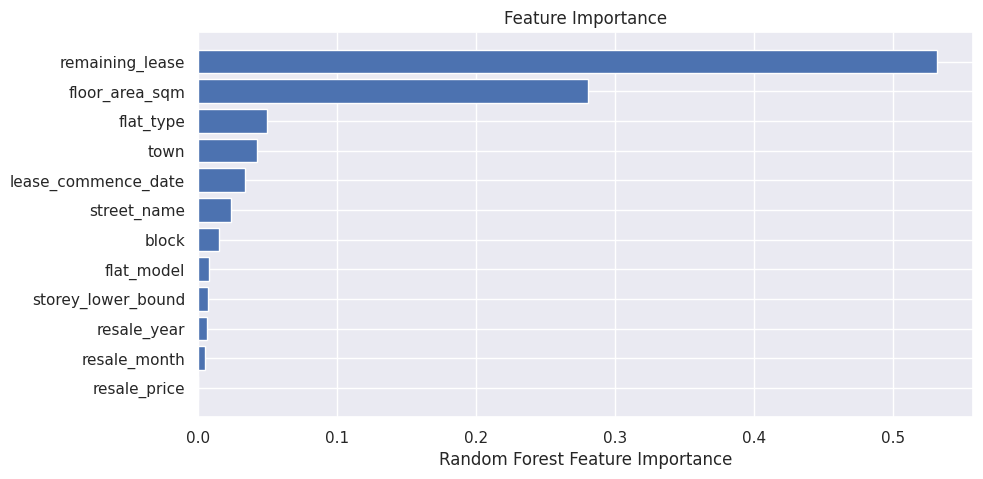

In [ ]:
sorted_idx = rf_regressor.feature_importances_.argsort()
plt.figure(figsize=(10,5))
plt.barh(df.columns[sorted_idx], rf_regressor.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.title("Feature Importance")

plt.show()


In [ ]:
# Save the model

model=rf_regressor.fit(x_train,y_train)
model


RandomForestRegressor(random_state=42)

In [ ]:
import pickle

# save the model to disk
filename = 'RandomForestRegressor_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(filename, file)

print(f"Saved {filename} model to disk")

Saved RandomForestRegressor_model.pkl model to disk


Prediction

In [ ]:
# get sample to predict the resale price
pre_df =df1.sample(n=5)
pre_df


,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
240570,5,3,114.0,49,59.0,14,1974.0,140000.0,68.0,1999,3,4,6
111494,22,4,762.0,221,84.0,19,1985.0,199000.0,68.0,1995,12,7,9
303662,2,3,401.0,24,67.0,15,1979.0,160000.0,68.0,2000,7,7,9
481832,21,4,664.0,448,101.0,16,1998.0,215000.0,68.0,2005,11,1,3
381897,22,4,244.0,219,84.0,19,1985.0,143000.0,68.0,2002,7,4,6


In [ ]:
# drop the resale price column
A = pre_df.drop('resale_price', axis = 1)

Resale Price


In [ ]:
# Make predictions on the sample
pre_pred = rf_regressor.predict(A)
pre_pred

array([138790.        , 197210.        , 155770.41666667, 219823.76      ,
       151685.        ])